## 1. Problem Statement: Sydney Restaurant Success Prediction

The goal of this project is to build a predictive model to evaluate the success of restaurants in Sydney using a real-world dataset containing over 10,000 records. The dataset includes various attributes such as location, type, cuisine, and customer ratings. Our objective is to identify which factors contribute the most to a restaurant's success and use machine learning models to predict ratings.

## 2. Data Collection

The data was given in the canvas. The dataset contains information for over 10,000 restaurants in the Sydney area for the year 2018.

### 2.1 Import Data and Required Packages

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import ast
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from collections import Counter

In [2]:
#reading the data

df=pd.read_csv("data/zomato_df_final_data.csv")

In [3]:
#inspect the first few rows of the data

print(df.head())



                                             address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmo

In [4]:
#check all the column names

print(df.columns)

Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')


### 2.2 Dataset information

| **Column**         | **Description**                                                  |
|--------------------|------------------------------------------------------------------|
| `address`          | Restaurant’s address (text)                                      |
| `cost`             | Average cost for two people in AUD (numeric)                     |
| `cuisine`          | Cuisines served by the restaurant (list)                         |
| `lat`              | Latitude (numeric)                                               |
| `link`             | URL to the restaurant’s page (text)                              |
| `lng`              | Longitude (numeric)                                              |
| `phone`            | Phone number (numeric)                                           |
| `rating_number`    | Restaurant rating (numeric)                                      |
| `rating_text`      | Restaurant rating (text)                                         |
| `subzone`          | Suburb in which the restaurant resides (text)                    |
| `title`            | Restaurant’s name (text)                                         |
| `type`             | Business type (list)                                             |
| `votes`            | Number of users who provided the rating (numeric)                |
| `groupon`          | Is the restaurant promoting itself on Groupon.com? (boolean)     |


## 3. Exploratory Data Analysis

In [5]:
#checking the numerical and categorical variables

num_var=df.select_dtypes(include="number").columns
cat_var=df.select_dtypes(exclude="number").columns

print(num_var)
print(cat_var)

Index(['cost', 'lat', 'lng', 'rating_number', 'votes', 'cost_2'], dtype='object')
Index(['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone',
       'title', 'type', 'groupon', 'color', 'cuisine_color'],
      dtype='object')


### 3.1 Checking Null values

In [6]:
#checking for the Null values

print(df.isnull().sum())

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64


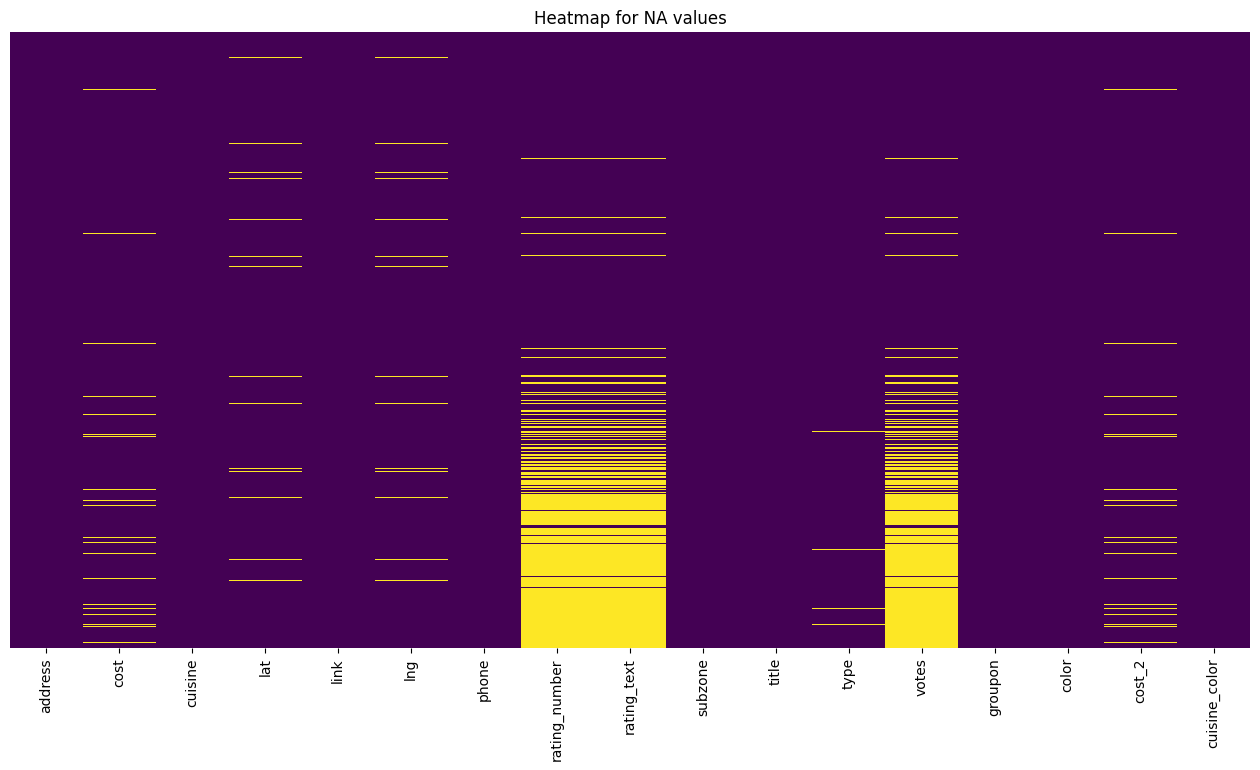

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap="viridis")
plt.title("Heatmap for NA values")
plt.show()

### 3.2 Detecting outliers

In [8]:
#detecting outliers in data

#list of numerical variables
numerical_cols=df[num_var]

#loop through each numerical columns to detect outliers

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1

    #define the bound for ouliers
    lower_bound= Q1 - 1.5*IQR
    upper_bound= Q3 + 1.5*IQR

    #outlier
    outliers=df[(df[col] < lower_bound) | (df[col]> upper_bound)]

    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

Outliers in cost:
                                                 address   cost  \
2       Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3       Sydney Opera House, Bennelong Point, Circular...  270.0   
5              46 Kensington Street, Chippendale, Sydney  150.0   
6                             3 Bridge Lane, CBD, Sydney  120.0   
8       The Rocks Centre, 12 Argyle Street, The Rocks...  125.0   
...                                                  ...    ...   
9860    Kareela Golf & Social Club, 1 Bates Drive, Ka...  135.0   
9946        Shop 217B Castle Towers, Castle Hill, Sydney  120.0   
10125   The Hydro Majestic, 52-88 Great Western Highw...  170.0   
10174   Shop 10.41, World Square Shopping Centre, 680...  120.0   
10322   The Hydro Majestic, 52-88 Great Western Highw...  160.0   

                                                 cuisine        lat  \
2                                           ['Japanese'] -33.867971   
3                                  

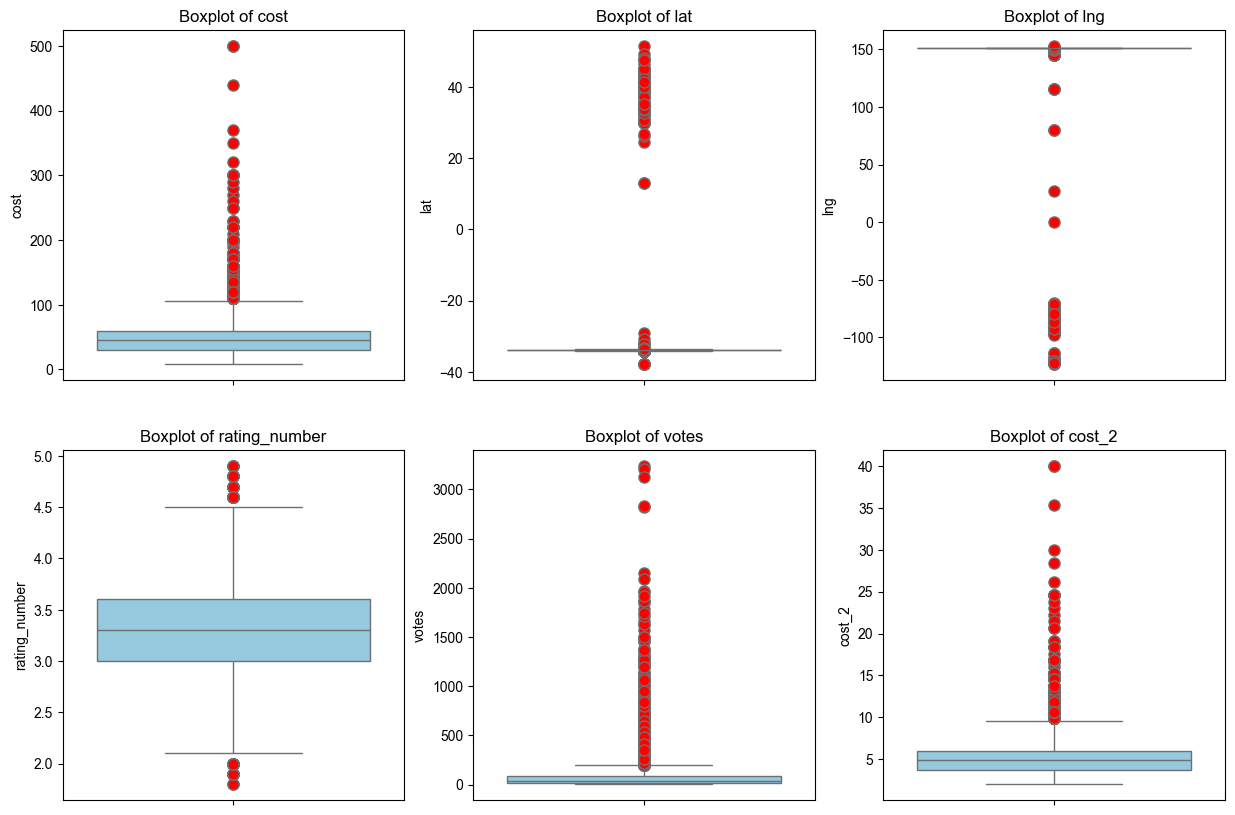

In [9]:
#visualizing outliers using boxplot 

#creating subplot axes
nrows=2
ncols=3
fig, axes =plt.subplots(nrows,ncols, figsize=(15,10))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# use to set style of background of plot
sns.set(style="whitegrid")

# Define properties for the outliers (fliers)
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')


for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue",flierprops=flierprops)
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout
plt.show()


### 3.3 How many unique cuisines are served by Sydney restaurants?

In [10]:
# Ensuring the 'cuisine' column is treated as a string type for manipulation
df['cuisine'] = df['cuisine'].astype(str)

# Cleaning and splitting the cuisines from string format to a list of cuisines
df['cuisine'] = df['cuisine'].str.strip("[]").str.replace("'", "").str.split(',')

# Flattening the list of cuisines into separate rows for each cuisine in the 'cuisine' column
df_exploded = df.explode('cuisine')

# Removing any leading/trailing spaces from each cuisine name
df_exploded['cuisine'] = df_exploded['cuisine'].str.strip()

# Counting the number of unique cuisines after the cleaning process
unique_cuisines = df_exploded['cuisine'].nunique()

# Getting a list of unique cuisine names
cuisine_list = df_exploded['cuisine'].unique()

print(f"There are {unique_cuisines} unique cuisines served by Sydney restaurants.")


There are 134 unique cuisines served by Sydney restaurants.


In [11]:
cuisine_counts=df_exploded["cuisine"].value_counts()

C:\Users\rohit\AppData\Local\Temp\ipykernel_19396\3637737149.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisine_counts.index[:25], x=cuisine_counts.values[:25],palette=colors)


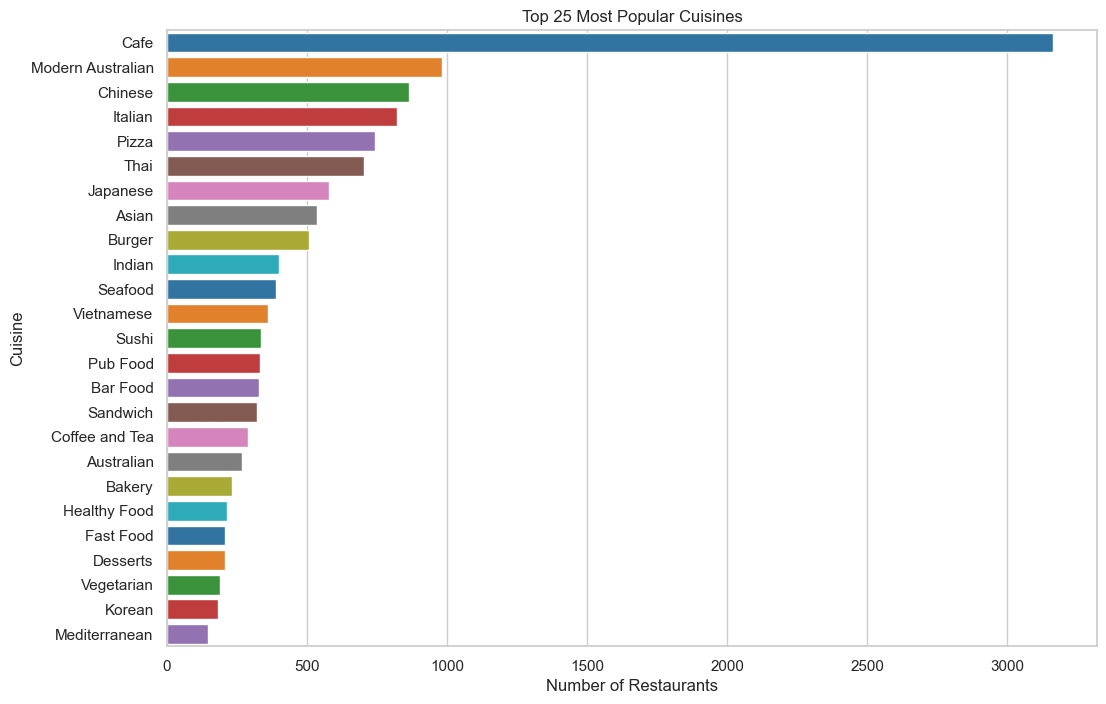

In [12]:
#plotting the top 15 cuisines offered by sydney restaurants

plt.figure(figsize=(12, 8))
colors = sns.color_palette("tab10", n_colors=25)
sns.barplot(y=cuisine_counts.index[:25], x=cuisine_counts.values[:25],palette=colors)  
plt.title('Top 25 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

### 3.4 Which suburbs (top 3) have the highest number of restaurants?

In [13]:
df["subzone"].nunique()

572

In [14]:
restaurant_suburb=df["subzone"].value_counts()

#getting the top 3 suburbs with the highest number of restaurants
top_3_suburbs = restaurant_suburb.head(3)

#result
print("Top 3 suburbs with the highest number of restaurants:")
print(top_3_suburbs)

Top 3 suburbs with the highest number of restaurants:
subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


C:\Users\rohit\AppData\Local\Temp\ipykernel_19396\1214469383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_suburbs.index[:3],y=top_3_suburbs.values[:3],palette="tab10")


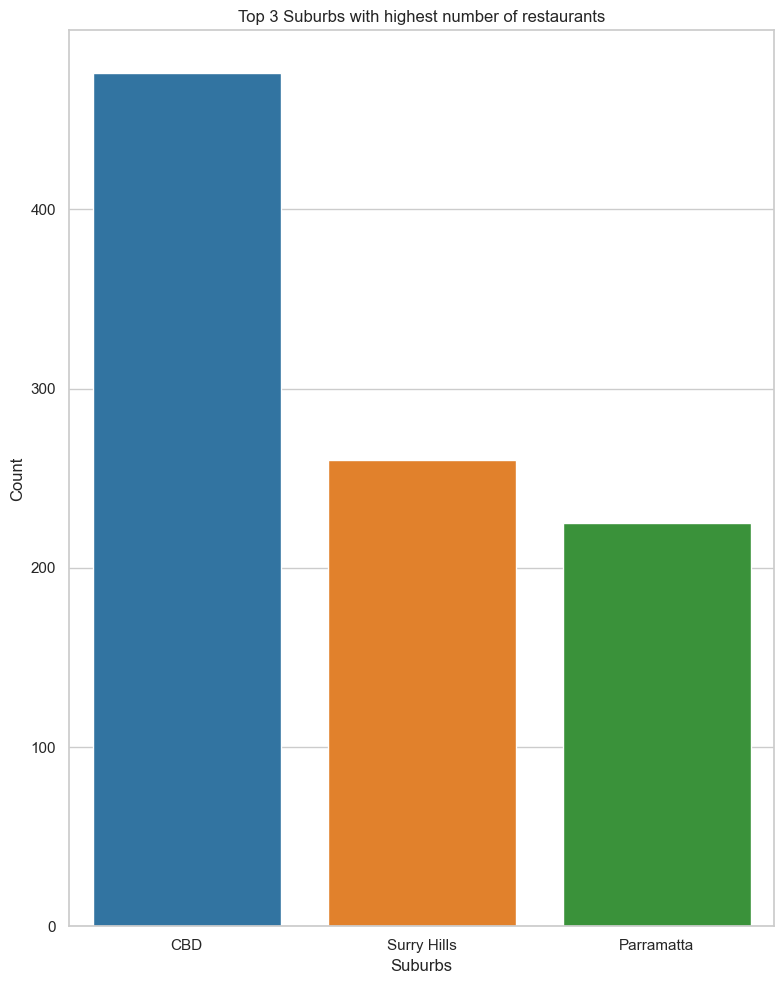

In [15]:
#visualizing the top 3 suburbs
plt.figure(figsize=(8,10))
sns.barplot(x=top_3_suburbs.index[:3],y=top_3_suburbs.values[:3],palette="tab10")
plt.title("Top 3 Suburbs with highest number of restaurants")
plt.xlabel("Suburbs")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### 3.5 “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”.

To answer this if the above statement is true or not, first we will make a boxplot to see the cost distribution for each rating category.

C:\Users\rohit\AppData\Local\Temp\ipykernel_19396\1683933843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['rating_text'], y=df['cost'], palette="tab10")


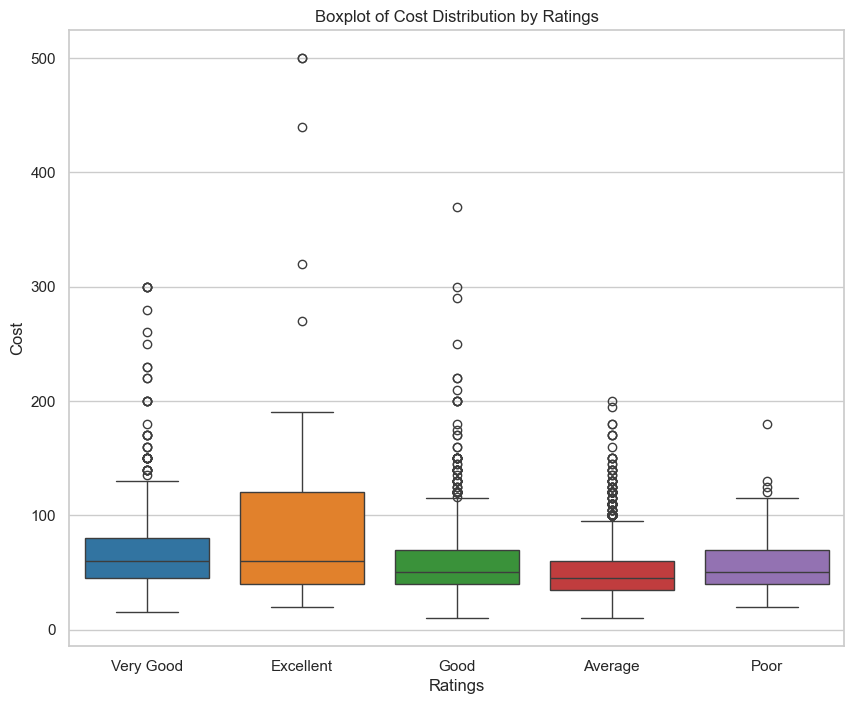

In [16]:
plt.figure(figsize=(10,8))

# Creating a boxplot to show the distribution of costs by rating
sns.boxplot(x=df['rating_text'], y=df['cost'], palette="tab10")

plt.xlabel("Ratings")
plt.ylabel("Cost")
plt.title("Boxplot of Cost Distribution by Ratings")
plt.show()


#### Key observations:

-"**Excellent**" ratings: These restaurants tend to have a higher median cost, with the boxplot showing that many of these restaurants fall in the higher cost range. The interquartile range (IQR) is higher compared to other ratings, indicating that restaurants with "Excellent" ratings tend to be more expensive on average.There are outliers above 200, indicating some restaurants with "Excellent" ratings have very high costs, with some reaching around 500. 

-"**Poor**" ratings:The median cost for "Poor" rated restaurants is 50, which is higher than "Average" rated restaurants.The IQR is slightly larger compared to "Average" rated restaurants, meaning there’s more cost variation among "Poor" rated restaurants.A few outliers show some "Poor" rated restaurants can have higher costs, but most are still relatively affordable.

-"**Very Good**" ratings:The median cost for "Very Good" rated restaurants is lower than "Excellent" rated ones.The IQR is smaller, indicating less variation in restaurant costs. The box is mostly concentrated below 100, suggesting that most "Very Good" rated restaurants are moderately priced.There are fewer outliers compared to "Excellent" rated restaurants, but still a few higher-cost restaurants in this category.

-"**Good**" ratings:The median cost is lower than "Very Good" and "Excellent" but still close to 50.The IQR is small, indicating that most "Good" rated restaurants are affordable, with costs primarily under 100.There are a few outliers above 200, but most restaurants are in a lower price range.

-"**Average**" ratings:The median cost is close to 45, making it one of the lower-cost categories.The IQR is small, meaning that there’s little variation in the cost for "Average" rated restaurants.There are a few outliers, but the majority of restaurants are in the affordable range, under 100.

lets also make a stacked bar plot for more clarification.

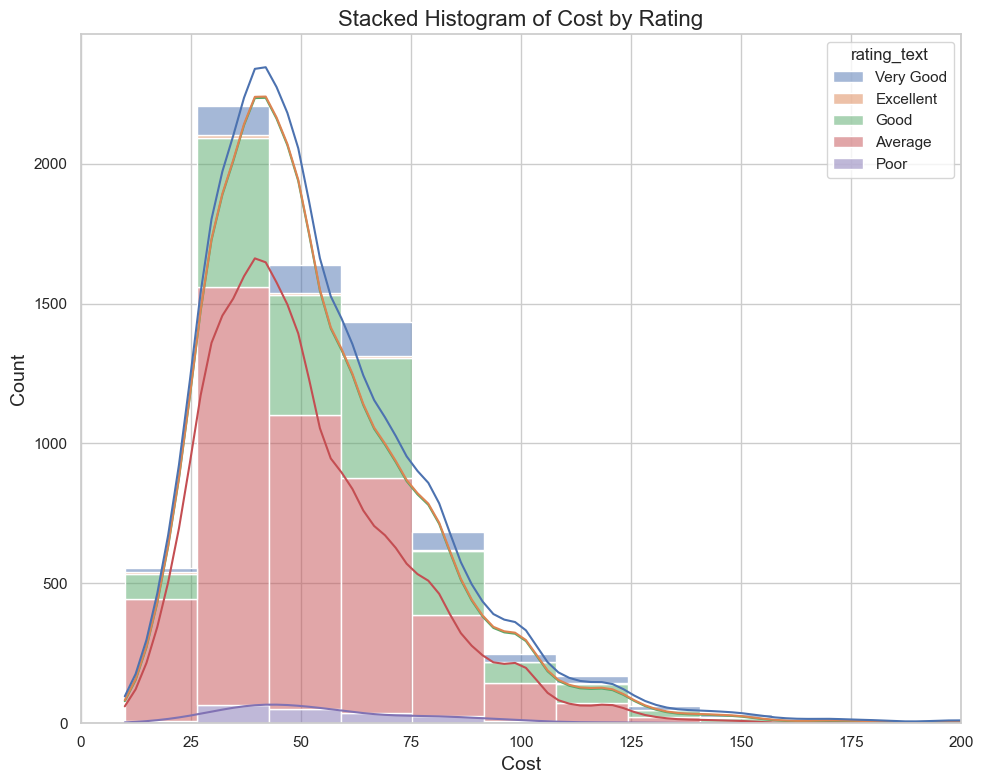

In [17]:
plt.figure(figsize=(10, 8))

# Using histplot 
sns.histplot(data=df, x="cost", hue="rating_text", kde=True, multiple="stack",bins=30)

# Limiting x-axis for better focus on the range
plt.xlim(0, 200)
plt.title('Stacked Histogram of Cost by Rating', fontsize=16)
plt.xlabel('Cost', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()



By looking at the chart we can support the statement.

Excellent Ratings (Orange Line): The orange line representing Excellent ratings peaks around higher cost values compared to other ratings, indicating that restaurants with Excellent ratings tend to have higher costs.

Poor Ratings (Purple Line): The purple line representing Poor ratings is mostly concentrated around the lower cost range, with very few restaurants having high costs.

To further quantify, we can create a summary statistics: 

In [18]:
# Summary statistics for each rating category
cost_summary = df.groupby('rating_text')['cost'].agg(["mean","median"])

print("Median cost per rating category:")
print(cost_summary)


Median cost per rating category:
                   mean  median
rating_text                    
Average       51.021267    45.0
Excellent    101.666667    60.0
Good          59.528114    50.0
Poor          55.845771    50.0
Very Good     71.515810    60.0


Based on the boxplot, stacked barplot and summary statistics, I agree with the statement. Restaurants with "Excellent" ratings are generally more expensive, as reflected by the higher median cost and the presence of more high-cost outliers. In contrast, "Poor" rated restaurants tend to have lower costs, with fewer high-cost outliers, supporting the idea that they are generally less expensive.


### 3.6 Univariate Analysis

#### 3.6.1 Cost Variable

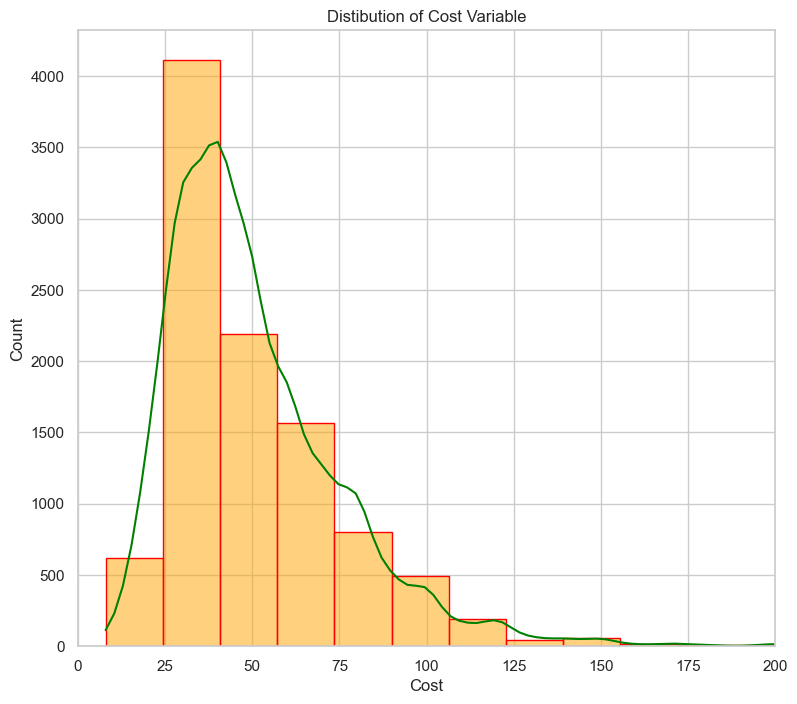

In [19]:
#creating histogram to see the distribution of the data
plt.figure(figsize=(9,8))
ax=sns.histplot(data=df,x="cost", bins=30, kde=True, color="orange",edgecolor="red")
ax.lines[0].set_color("green")
plt.title("Distibution of Cost Variable")
plt.xlabel("Cost")
plt.xlim(0, 200)
plt.show()

#### Key Interpretation:

- The histogram shows that the majority of restaurant costs are clustered between 20 and 50. 
- This can be observed from the tall bars in this range, with the highest peak around 25.
- The distribution is right-skewed, meaning there are fewer restaurants with higher costs (over 100), as indicated by the long tail on the right side.
- The green KDE curve (Kernel Density Estimate) overlays the histogram, providing a smooth representation of the probability density. It confirms that most restaurants have costs concentrated between 20 and 50.
- There are some outliers in the dataset, as seen from the bars on the right-hand side that go beyond 100, with a few even reaching as high as 200. This indicates a small proportion of restaurants with much higher costs, but they are very uncommon.

#### 3.6.2 Rating Variable

C:\Users\rohit\AppData\Local\Temp\ipykernel_19396\277035686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_number', data=df, palette='Set2')


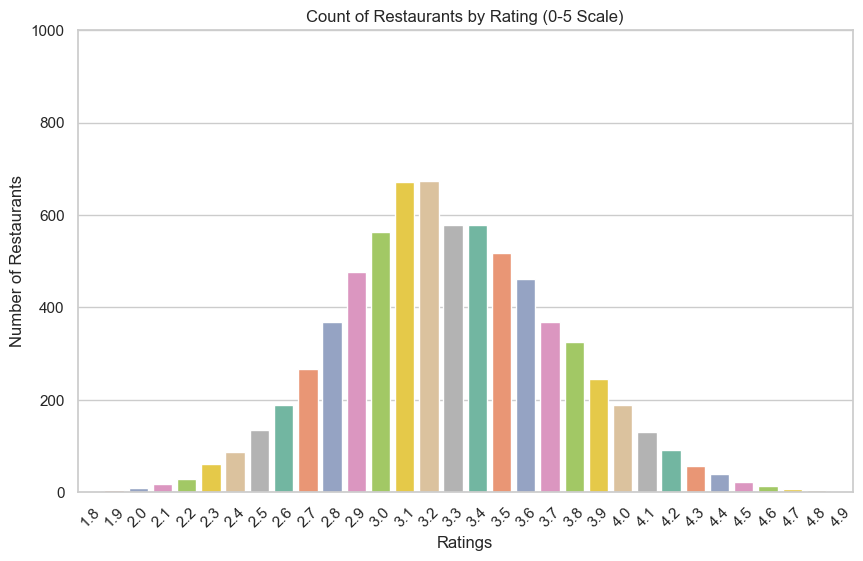

In [20]:

# Creating a countplot to show the count of each rounded rating number
plt.figure(figsize=(10, 6))
sns.countplot(x='rating_number', data=df, palette='Set2')
plt.title('Count of Restaurants by Rating (0-5 Scale)')
plt.xlabel('Ratings')
plt.ylabel('Number of Restaurants')
plt.ylim(0, 1000) 
plt.xticks(rotation=45)
plt.show()


#### Key Interpretation:

- Most restaurants are rated between 3.0 and 3.5, suggesting that the majority are considered average to slightly above average in quality.
- Extremely low or high ratings are relatively rare, meaning most restaurants avoid being rated as exceptionally bad or outstanding.
- This distribution shows that customer ratings tend to cluster around the middle, and it's harder for restaurants to achieve exceptional or very poor ratings.

#### 3.6.3 Type Variable

In [21]:
print(df["type"].isna().sum())

48


In [22]:
# Converting the 'type' column to string type for consistent manipulation
df['type'] = df['type'].astype(str)

# Cleaning and splitting the 'type' column into a list of individual types
df['type'] = df['type'].str.strip("[]").str.replace("'", "").str.split(',')

# Flattening the list of types into separate rows for each type entry in the 'type' column
df_exploded_2 = df.explode('type')

# Removing any leading/trailing spaces from each type entry
df_exploded_2['type'] = df_exploded_2['type'].str.strip()

# Counting the number of occurrences for each unique type
type_count = df_exploded_2["type"].value_counts()


C:\Users\rohit\AppData\Local\Temp\ipykernel_19396\2549718096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.values[:10],y=type_count.index[:10],palette="tab10")


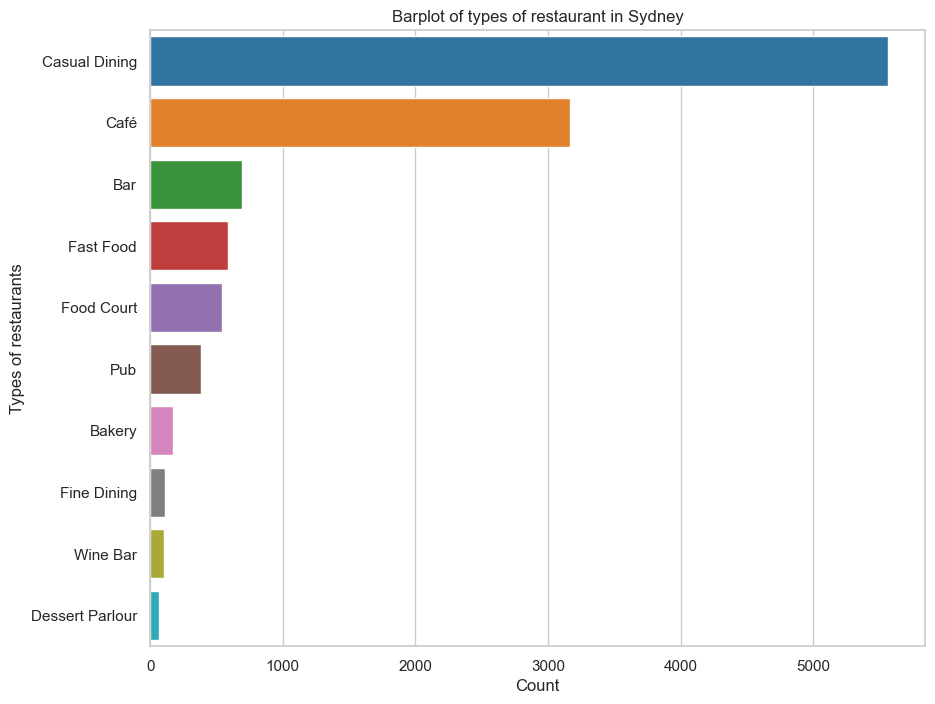

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(x=type_count.values[:10],y=type_count.index[:10],palette="tab10")
plt.title("Barplot of types of restaurant in Sydney")
plt.xlabel("Count")
plt.ylabel("Types of restaurants")
plt.show()

The bar plot shows the count of different types of restaurants in Sydney. Casual Dining is the most common type, followed by Cafés, with both having significantly higher counts compared to other categories. Less common types include Bars, Fast Food, Food Courts, and others like Fine Dining and Dessert Parlour. This suggests that Sydney has a preference for casual and café-style dining options.

### 3.7 Bivariate analysis

#### 3.7.1 Cost vs Rating Number

It helps us to understand if more expensive restaurants are perceived to be of higher quality.

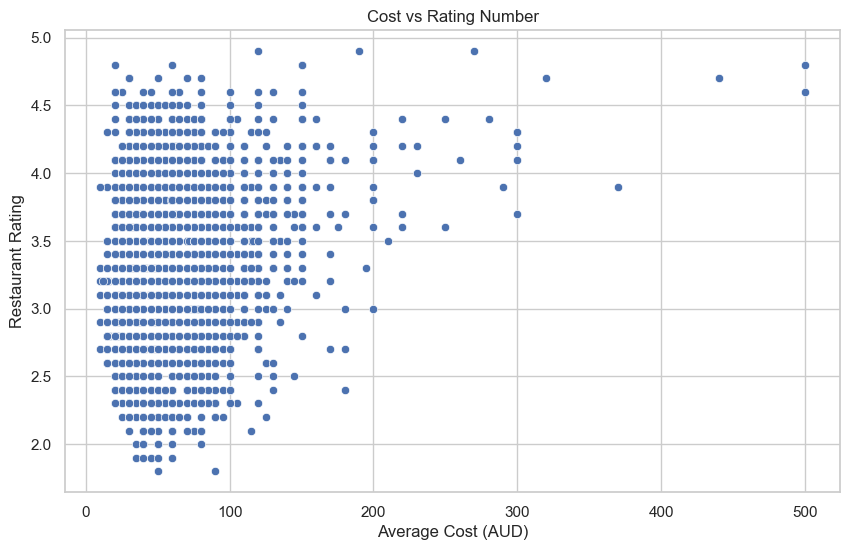

In [24]:
# Scatter plot for Cost vs Rating Number
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='rating_number', data=df)
plt.title('Cost vs Rating Number')
plt.xlabel('Average Cost (AUD)')
plt.ylabel('Restaurant Rating')
plt.show()

The scatter plot shows the relationship between Average Cost (AUD) and Restaurant Rating. Most restaurants have an average cost below $100 and their ratings are spread across all categories. However, restaurants with higher costs (above $200) tend to have ratings above 4.0, indicating that more expensive restaurants are generally rated better. There are very few low-cost restaurants with ratings above 4.5, suggesting a positive correlation between cost and higher ratings.

#### 3.7.2 Votes vs Rating Text

It shows the engagement level of customers and whether higher-rated restaurants get more recognition.

C:\Users\rohit\AppData\Local\Temp\ipykernel_19396\899437959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_text', y='votes', data=df, palette="tab10")


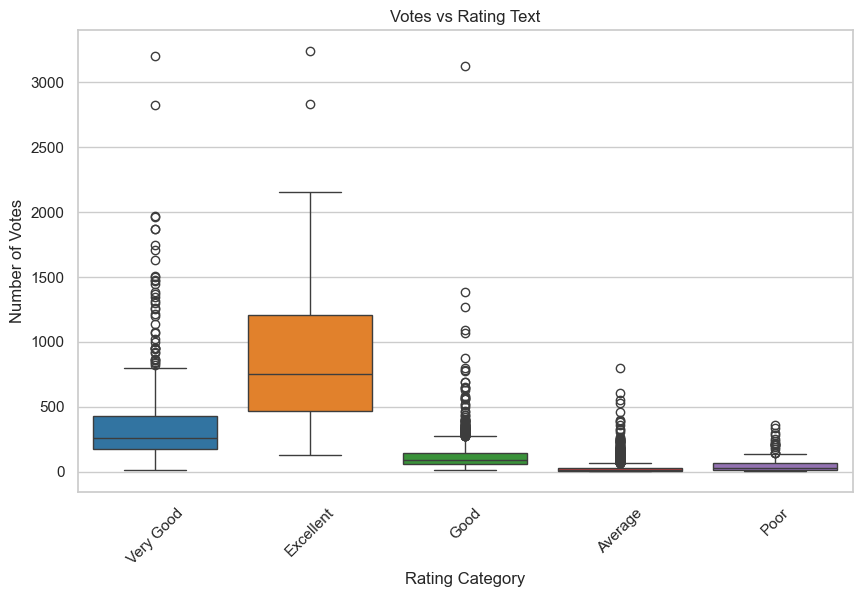

In [25]:
# Box plot for Votes vs Rating Text
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_text', y='votes', data=df, palette="tab10")
plt.title('Votes vs Rating Text')
plt.xlabel('Rating Category')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.show()

The box plot shows the distribution of Number of Votes across different Rating Categories (Poor, Average, Good, Very Good, and Excellent). Restaurants with an Excellent rating tend to receive the highest number of votes, followed by Very Good. Lower-rated categories (Good, Average, and Poor) have fewer votes, indicating less customer engagement. The presence of several outliers suggests that a few restaurants in each category attract significantly more votes compared to the average.

### 3.8 3D interactive plots 

This plot helps us to visualize the relationship between Cost, Votes, and Rating Number in 3D space.
We can interact with the plot by rotating, zooming, and hovering to see more details.

In [26]:

# Creating an advanced 3D scatter plot with detailed hover information
fig = px.scatter_3d(df, 
                    x='cost', 
                    y='votes', 
                    z='rating_number', 
                    color='rating_text',  # Color by rating category
                    hover_name='title',  # Show restaurant name on hover
                    hover_data={'address': True, 'cuisine': True, 'cost': ':.2f', 'votes': True, 'rating_number': True},
                    title='Interactive 3D Scatter Plot: Cost vs Votes vs Rating',
                    labels={'cost': 'Average Cost (AUD)', 'votes': 'Number of Votes', 'rating_number': 'Restaurant Rating'},
                    template='plotly_dark')  # Optional theme for better visuals

# Customizing markers and add animation based on rating category
fig.update_traces(marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Updating layout for better interaction
fig.update_layout(scene=dict(
                    xaxis=dict(title='Cost (AUD)', showgrid=True, showbackground=True, backgroundcolor="rgb(230, 230,230)"),
                    yaxis=dict(title='Number of Votes', showgrid=True, showbackground=True, backgroundcolor="rgb(230, 230,230)"),
                    zaxis=dict(title='Rating Number', showgrid=True, showbackground=True, backgroundcolor="rgb(230, 230,230)")),
                    legend=dict(title='Rating Category'))


fig.update_layout(scene_dragmode='orbit', margin=dict(l=0, r=0, b=0, t=40), legend_title_text='Rating Text')
fig.show()

#### Key Insights:
High Ratings with High Votes: Restaurants with higher ratings (e.g., Very Good, Excellent) tend to have a higher number of votes, indicating that popular restaurants are often highly rated.

Cost Impact on Rating: Most restaurants with high ratings (Very Good and Excellent) have average costs clustered around $50 - $100. Very few high-cost restaurants have low ratings.

Low-Rated Restaurants: Restaurants rated Poor and Average generally have fewer votes and lower costs, suggesting that they are less popular and cater to a budget-conscious audience.

#### 3.8.2 Geographical map 

In [27]:
# Create a subset of the dataframe, excluding rows where 'cost' is NaN
df_filtered = df.dropna(subset=['cost'])

# Create an interactive map with Plotly's scatter_mapbox using the filtered dataframe
fig = px.scatter_mapbox(df_filtered, 
                        lat="lat", 
                        lon="lng", 
                        color="rating_text",  # Use rating categories for coloring
                        size="cost",  # Size of markers based on cost
                        hover_name="title",  # Show restaurant name on hover
                        hover_data={"lat": False, "lng": False, "rating_number": True, "cuisine": True, "cost": True},  # Additional info on hover
                        zoom=11,  # Initial zoom level
                        height=600,
                        title="Geographical Distribution of Restaurants in Sydney")

# Set up Mapbox style
fig.update_layout(mapbox_style="open-street-map")  # Change style to your preference: 'carto-positron', 'stamen-terrain', etc.
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})  # Adjust margins for a cleaner look

# Show the interactive map
fig.show()

The above resulting plot will display a geographic distribution of restaurants according to their dining average cost, where the marker color maps to a rating category. This map is interactive, allowing zooming, and hovering over each marker for detailed information like restaurant name, rating, kind of food, and place of location. Similarly, the cluster can be explored just by clicking on it to figure out the spatial pattern. This level of interactivity offers an intuitive way to find the top-rated restaurants, cost patterns, and geographical restaurant trends.

Interactive plots vs Non-interactive plots
Interactive plots allow us to dynamically interact with the visualizations through actions such as zooming, panning, hovering to display tooltips, and filtering data points. These plots are typically built using libraries like Plotly, Bokeh, or Tableau, and are highly useful for exploratory data analysis, as they enable users to drill down into specific details and explore various aspects of the data. In contrast, non-interactive plots are static images generated by libraries like Matplotlib and Seaborn, which present a fixed view of the data without any additional interaction. While non-interactive plots are simpler and ideal for quick visual summaries and reports, interactive plots offer a more engaging way to analyze complex datasets.

### Tableau 

The Tableau Public dashboard provides an interactive platform showcasing various visualizations related to the Sydney restaurant dataset, highlighting insights on restaurant ratings, cuisine distribution, and location-based performance. With features such as dynamic filters, drill-down capabilities, and interactive maps, the dashboard allows users to explore the data visually, making it easy to identify patterns and correlations.

link to the dashboard:
https://public.tableau.com/app/profile/rohit.baral/viz/tableau_part/Dashboard1